# Nesterov Method
#### Author: Kirill Zakharov
##### Date: 07.13.20

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [16]:
def f(x, y): #initial function
    return (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2
    

def partialX(f, x, y, d): #take the partial derivative by X
    return (f(x + d, y) - f(x, y))/d

def partialY(f, x, y, d): #take the partial derivative by Y
    return (f(x, y + d) - f(x, y))/d

def grad(f, x, y, d): #function for finding the gradient
    x0 = partialX(f, x, y, d)
    y0 = partialY(f, x, y, d)
    return (x0, y0) #output is the vector of patial derivatives

def nesterov_m(f, x, y, step, eps, d, max_iter, gamma):
    iters = 0
    x0 = x
    y0 = y
    g = grad(f, x0, y0, d)
    xmin = x0 - step*g[0]
    ymin = y0 - step*g[1]
    minf = (xmin, ymin)
    array = [minf] 
    v = [0, 0]
    m = [0, 0]
    
    while abs(abs(f(x0, y0)) - abs(f(xmin, ymin))) > eps and iters < 1000:
        x0 = xmin
        y0 = ymin
        
        m[0] = x0 - gamma*v[0]
        m[1] = y0 - gamma*v[1]
        g = grad(f, m[0], m[1], d)
        
        v[0] = gamma*v[0] + step*(g[0])
        v[1] = gamma*v[1] + step*(g[1])
        
        xmin = x0 - v[0]
        ymin = y0 - v[1]
        iters += 1
        
        array.append((xmin, ymin)) #array of every steps
        minf = (xmin, ymin)
    return minf, iters, array

In [17]:
step = 0.01
eps = 10**(-7)
d = 0.001
max_iter = 1000
gamma = 0.9
minf, iters, array = nesterov_m(f, 0.7, 1.4, step, eps, d, max_iter, gamma)
print(f"Iterations: {iters}\nMinimum: {minf}")

Iterations: 196
Minimum: (2.978236834145668, 0.49405462509447595)


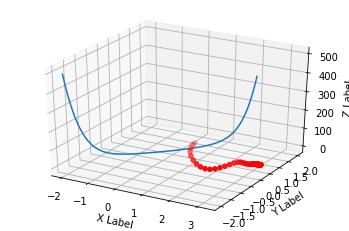

In [18]:
res = np.array(array).T          #transpose array
val = list(map(f,res[0],res[1])) #the values of the function in points
xs = list(res[0])
ys = list(res[1])
zs = val

x1 = np.linspace(-2,2,num=1000)
y1 = np.linspace(-2,2,num=1000)
z1 = list(map(f, x1, y1))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x1, y1, z1)
ax.scatter(xs, ys, zs, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

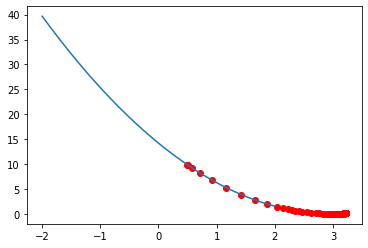

In [19]:
resY = []
for _ in range(len(res[1])):
    resY.append(minf[1])
f_fixY = list(map(f,res[0], resY))
resY2 = []
for _ in range(len(x1)):
    resY2.append(minf[1])
f_fullY = list(map(f,x1, resY2))
plt.scatter(xs, f_fixY, c='r')
plt.plot(x1, f_fullY)

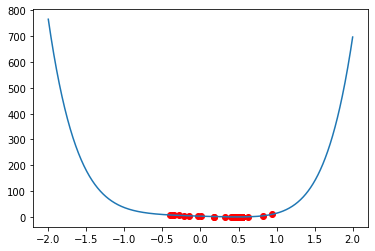

In [21]:
resX = []
for _ in range(len(res[0])):
    resX.append(minf[0])
f_fixX = list(map(f,resX, res[1]))
resX2 = []
for _ in range(len(y1)):
    resX2.append(minf[0])
f_fullX = list(map(f,resX2, y1))
plt.scatter(ys, f_fixX, c='r')
plt.plot(y1, f_fullX)